**6. Custom GD for Simple linear regression**

LinearRegression()

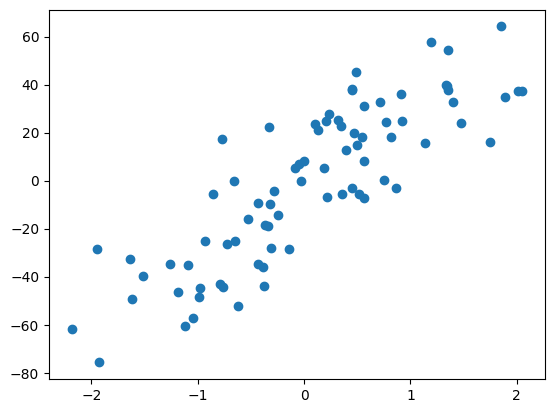

In [155]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

plt.scatter(X_train, y_train)

lr = LinearRegression()
lr.fit(X_train, y_train)

In [156]:
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [157]:
# from sklearn.model_selection import cross_val_score

# np.mean(cross_val_score(lr, X, y, scoring='r2', cv=10))

from sklearn.metrics import r2_score

r2_score(y_test, lr.predict(X_test))

0.6345158782661012

In [158]:
class CustomGD:

  def __init__(self, learning_rate, epocs):
    self.coef_ = 1 #  m
    self.intercept_ = 0 # c
    self.learning_rate = learning_rate
    self.epocs = epocs

  def fit(self, X_train, y_train):
    # Aim is to calculate intercept and coeffcient using GD (not OLS)
    for i in range(self.epocs):
      slope_intercept = -2 * (np.sum(y_train - self.coef_*X_train.ravel() - self.intercept_))
      self.intercept_ = self.intercept_ - slope_intercept*self.learning_rate

      slope_coef = -2 * np.sum((y_train - self.coef_*X_train.ravel() - self.intercept_) * X_train.ravel())
      self.coef_ = self.coef_ - slope_coef*self.learning_rate

  def predict(self, X_test):
    return (self.coef_ * X_test.ravel()) + self.intercept_

In [159]:
lr = CustomGD(0.001, 50)
lr.fit(X_train, y_train)

print(lr.coef_)
print(lr.intercept_)

28.1179188968214
-2.2677636439109468


In [160]:
r2_score(y_test, lr.predict(X_test))

0.6345497235674873